# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [161]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [162]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

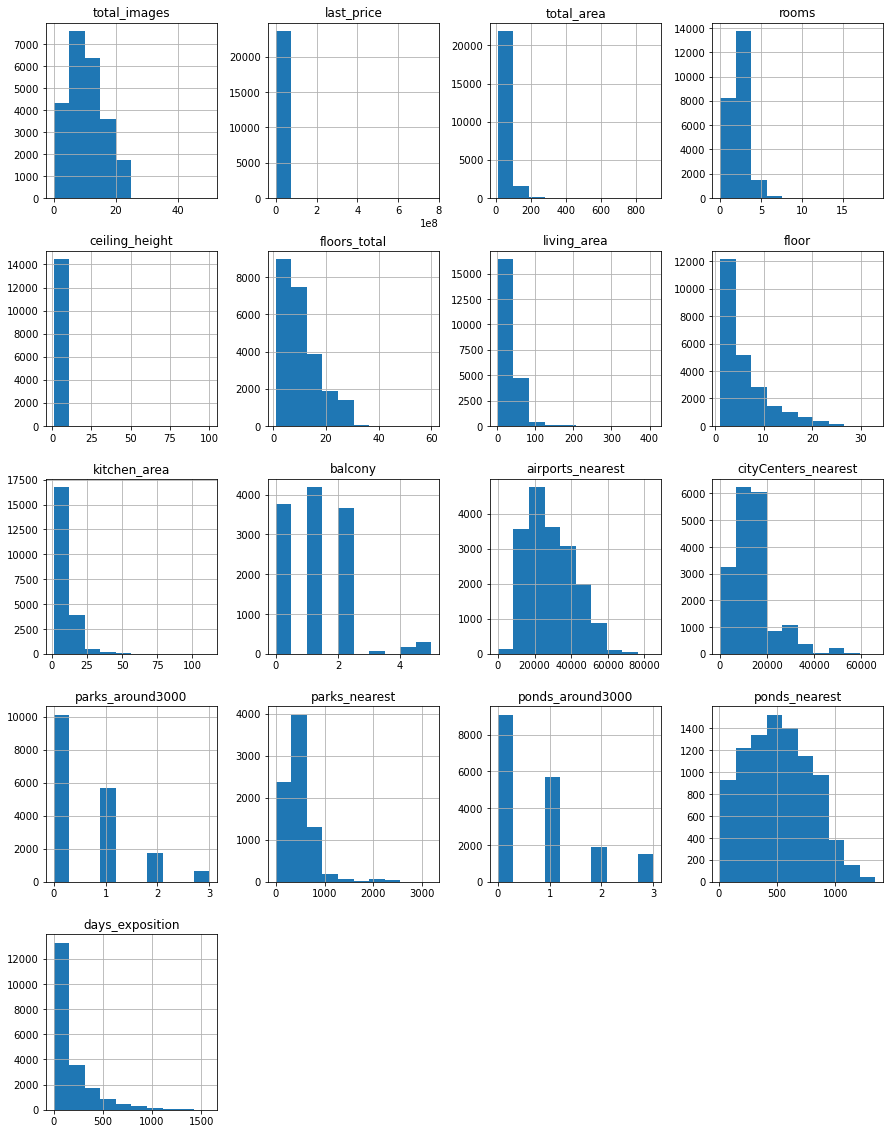

In [164]:
df.hist(figsize=(15, 20))
plt.show()

In [165]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [166]:
df.duplicated().sum()

0


**Вывод**: 
    На основе полученного датасета видно, что нужно поработать с пропусками, которых очень много, аномалиями и типами данных. Всего 23699 строк, 22 колонки. По гистограммам распределения не везде нормальные, надо изучить. Явных дубликатов нет. Но имеются неявные. 
    
  Пропуски видно в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest,parks_around3000,parks_nearest, ponds_around3000, ponds_nearest и days_exposition. Нужно будет подумать, как их обработать и чем заполнить. Аномалии в наименованиях -- встречаются поселок и посёлок, нужно привести все названия к единому виду. 
    
 Аномалии: большое количество квартир с 0 комнат, нужно будет посчитать их количество, и, возможно, удалить. Странно видеть количество балконов -- 0, 4 и 5. Надо будет внимательнее изучить столбец. Странно видеть квартиры, которые находятся чуть ли не на нулевом расстоянии от аэропорта, это скорее всего выбросы. В столбце kitchen_area есть пропуски, маловероятные значения площади кухни: минимальное 1.3 кв.м, а максимальное 112 кв.м, высота потолков -- от 1 метра (что маловероятно) до 100 м.В столбце living_area имеется небольшое число пропусков; минимальная площадь 2 кв м -- явная аномалия, максимальная площадь --  409.7 кв м. Столбец is_apartment нужно поменять тип данных на bool, много пропусков, вероятно, это указывает на то, что квартира -- не араптаменты. 
 
 Поменять тип данных также следует в цене -- на целочисленное значение, чтобы было удобнее анализировать и считать большие числа, то же самое с расстояниями. А также поменять на целочисленный тип в столбцах balcony и floors_total



### Предобработка данных

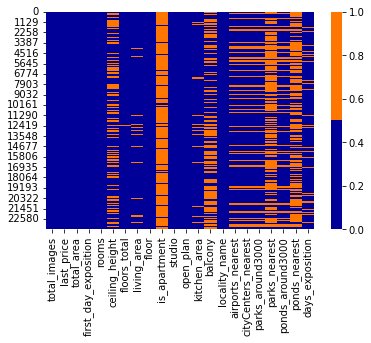

In [167]:
#чтобы лучше увидеть столбцы с пропусками, построим тепловую карту, где ооранжевым цветом будут обозначены пропуски
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ff7700']
a = sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

По таблице видим, что пропуски есть в следующих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest,parks_around3000,parks_nearest, ponds_around3000, ponds_nearest и days_exposition                    
                           

## Балконы

In [168]:
#Начнем со столбца balcony, предполагается, что пропуск = нет балкона, поэтому можно заменить их нулями
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [169]:
df.balcony.fillna(0, inplace=True)
df['balcony'].isna().sum()

0

## Населенный пункт

In [170]:
#дальше посмотрим на столбец locality_name, в нем не очень много пустых значений
df['locality_name'].isna().sum()

49

In [171]:
#посмотрим на названия, сразу видно, что есть е и ё в слове поселок, нужно заменить на е
df['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [172]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('Ё', 'Е')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Видим, что в названии некоторых населенных пунктов, типы населенных пунктов содержат неявные дубликаты: поселок (поселок городского типа, городской, коттеджный) Заменим их

In [173]:
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace('городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('станции', '')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок  Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок  Лебяжье', 'поселок  Сиверский',
       'поселок Молодцово', 'поселок  Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок  Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'З

In [174]:
df['locality_name'].value_counts()

Санкт-Петербург            15721
поселок Мурино               556
поселок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок Севастьяново           1
село Никольское                1
поселок Тесово-4               1
поселок   Приветнинское        1
поселок Дзержинского           1
Name: locality_name, Length: 329, dtype: int64

Предполагаю, что в данном случае можно заменить пропуски модой, то есть значением "Санкт-Петербург", поскольку так или иначе все квартиры находятся в районе Питера.

In [175]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')
df['locality_name'].isna().sum()

0

## Апартаменты

Теперь заполним пропуски в столбце is_apartment. Пропусков очень много, предположим, что там, где пропуск, квартира не является апартаментами, соответственно, можно заполнить значением 'False'

In [176]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

In [177]:
df['is_apartment'].unique()

array([False,  True])

## Parks_nearest, parks_around3000, ponds_nearest and ponds_around3000

Представляется, что пары признаков, отвечающие за парки и водоемы нужно обрабатывать совместно (столбцы parks_nearest и parks_around3000, ponds_nearest и ponds_around3000)

In [178]:
#выясним, как много парков за пределами 3 км
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

3190.0    2
3064.0    1
3013.0    1
Name: parks_nearest, dtype: int64

Таких парков немного, всего 4. И небольшое отклонение от 3000. Возможно, можно их заменить на 3000 м.

In [179]:
df.parks_nearest.where(df.parks_nearest.isna() | (df.parks_nearest <=3000), 'другие'==3000, inplace=True)
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

Series([], Name: parks_nearest, dtype: int64)

In [180]:
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       15620
parks_around3000     5518
dtype: int64

Заполним пропуски значением 0 по признаку parks_around3000 (то есть на дистанции 3000 м парков нет), а по признаку parks_nearest пропуски заменим значением 5000 (если в шаговой доступности парков нет, то идти до них далеко. 5 км выглядит правдоподобно, так как максимальное значение 6000)

In [181]:
df['parks_around3000'].fillna(0, inplace=True)
df['parks_nearest'].fillna(5000, inplace=True)
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       0
parks_around3000    0
dtype: int64

В столбцах ponds_around3000 и ponds_nearest предполагается действовать аналогично. 

In [182]:
df['ponds_around3000'].fillna(0, inplace=True)
df['ponds_nearest'].fillna(5000, inplace=True)
df[['ponds_nearest', 'ponds_around3000']].isna().sum()

ponds_nearest       0
ponds_around3000    0
dtype: int64

## Высота потолков

ceiling_height по признаку высота потолков наблюдается большой разброс значений, есть аномалии. Надо выяснить, каковы строительные нормы для высоты потолка
Из строительных норм жилых зданий следует, что _высота жилых помещений от пола до потолка должна быть не менее 2,5 м_, для климатических подрайонов IА, IБ, IГ, IД, IIА - не менее 2,7 м. Высоту этажей от пола до пола для жилых домов социального назначения рекомендуется принимать не более 2,8 м, для климатических подрайонов IА, IБ, IГ, IД, IIА - не более 3,0 м. При этом в сталинках высота потолков может быть выше 3 метров, самый максимум -- 5 метров.
Получается, что высота потолков меньше 2 метров и больше 5 метров может считаться выборосом (гипотеза). Для этого надо посчитать количество таких записей и изучить, можно ли их удалить.

In [183]:
df.query('ceiling_height <= 2.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,6.50,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,False,...,6.00,1.0,Луга,NaN,NaN,0.0,5000,0.0,5000.0,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,False,...,8.80,2.0,Тосно,NaN,NaN,0.0,5000,0.0,5000.0,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0.0,поселок Мга,NaN,NaN,0.0,5000,0.0,5000.0,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,False,...,NaN,0.0,Луга,NaN,NaN,0.0,5000,0.0,5000.0,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,False,...,10.10,0.0,поселок Металлострой,25268.0,26980.0,0.0,5000,0.0,5000.0,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,False,...,12.00,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,6.00,0.0,Выборг,NaN,NaN,0.0,5000,0.0,5000.0,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,5000,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,False,...,6.00,0.0,Выборг,NaN,NaN,0.0,5000,0.0,5000.0,282.0


Записей с аномально низкими потолками оказалось всего 14. Это сильно меньше 10% всех данных, так что можно их беспощадно удалить. 

In [184]:
df.drop(df[df.ceiling_height <= 2.0].index, inplace=True)
df = df.reset_index(drop=True)
df.query('ceiling_height <= 2.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [185]:
df.query('ceiling_height > 5.0').sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5666,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,5000.0,267.0
17433,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,False,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,5000,0.0,5000.0,469.0


Квартир с аномально высокими потолками оказалось целых 36 записей, это много. Удалить все кажется неправильным решением. Возможно, нужно посмотреть на разброс этих записей и оставить только те, которые кажутся более или менее вероятными в каких-нибудь царских хоромах. Так, например, высота потолков в 25 и 100 метров кажется определенным выбросом.

In [186]:
df.query('ceiling_height > 5').pivot_table(index="ceiling_height", values="living_area", aggfunc='max')

,living_area
ceiling_height,
5.2,159.5
5.3,190.0
5.5,83.0
5.8,68.0
6.0,147.0
8.0,41.0
8.3,19.3
10.3,15.5
14.0,32.4


Высота потолков 20.0 и выше кажется аномальной. Возможно, это технический сбой или неправильный ввод, как вариант можно поделить эти значения на 10, а остальные аномальные записи удалить.

In [187]:
df.loc[(df.ceiling_height >= 20.0) & (df.ceiling_height <= 32), 'ceiling_height'] /= 10
df['ceiling_height'] = df.drop(df[df.ceiling_height > 5].index, inplace=True)
df.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [188]:
df['ceiling_height'].median()

nan

In [189]:
#после того, как выявили аномалии, можно восстановить пропуски в столбце оптимальным значением 2.5м
df.ceiling_height.fillna(2.5, inplace=True)
df.reset_index(drop=True)
df['ceiling_height'].isna().sum()

0

In [190]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area             1899
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2271
balcony                    0
locality_name              0
airports_nearest        5532
cityCenters_nearest     5509
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3176
dtype: int64

## Близость аэропорта

В столбце airports_nearest также есть пустые значения. Но сначала разберемся с аномалиями: прочитав в интернете (https://www.m24.ru/articles/kvartira/22012014/35075) правила строительства жилых домов в районе аэропортов, можно выделить следующие реферные значения. 1) минимальное расстояние до аэропорта 5000 м. Посмотрим, сколько таких записей в датасете и удалим их. 2) в среднем нормальное значение -- 30 км от аэропорта. Но можно предположить, что среднее расстояние до аэропорта в населенных пунктах будет совпадать, так что можно попробовать заполнить пропуски средними значениями по признаку населенный пункт.

In [191]:
df.query('airports_nearest < 5000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21073,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.5,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,5000,0.0,5000.0,60.0


In [192]:
df.drop(df[df.airports_nearest < 5000].index, inplace=True)
df = df.reset_index(drop=True)

In [193]:
df['airports_nearest'].isna().sum()

5532

In [194]:
for t in df['locality_name'].unique():
    df.loc[(df['locality_name'] == t) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[(df['locality_name'] == t), 'airports_nearest'].mean()

In [195]:
df['airports_nearest'].isna().sum()

4854

Видимо, некоторые значения остались пустыми, потому что для некоторых населенных пунктов не указано расстояние до аэропорта. Поэтому, теоретически, можно заполнить эти пропуски максимальным значением. Возможно, если расстояние не указано, то аэропорт далеко. Выглядит правдоподобно.

In [196]:
distance_max = df['airports_nearest'].max()
df['airports_nearest'].fillna(distance_max, inplace = True)
df = df.reset_index(drop=True)
df['airports_nearest'].isna().sum()

0

## Расстояние до центра города

In [197]:
df['cityCenters_nearest'].isna().sum()

5509

В столбце cityCenters_nearest 5,5 тыс пропусков. Есть вариант двигаться в том же направлении, что и с аэропортами. Если известен населенный пункт, заполним средним арифметическим значением по месту, а если не известен населенный пункт, то максимальным значением, так как, предположительно, расстояние до центра города не близкое.

In [198]:
for t in df['locality_name'].unique():
    df.loc[(df['locality_name'] == t) & (df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    df.loc[(df['locality_name'] == t), 'cityCenters_nearest'].mean()

In [199]:
centre_max = df['cityCenters_nearest'].max()
df['cityCenters_nearest'].fillna(centre_max, inplace = True)
df = df.reset_index(drop=True)
df['cityCenters_nearest'].isna().sum()

0

## Days_exposition 

Теперь займемся столбцом days_exposition. 

In [200]:
df['days_exposition'].isna().sum()

3176

In [201]:
df['days_exposition'].max()

1580.0

Пропусков много, удалять нельзя. Максимальное время экспозиции -- 1580 дней, это 4 года! Как вариант, можно предположить, что если days_exposition не заполнен, то, возможно, квартира еще не продалась, и объявление еще висит. Так что можно оставить эти значения пустыми и учитывать максимальное значение.

Относительно столбца kitchen_area. Посмотрим, сколько пустых значений

## Площадь кухни

In [202]:
df['kitchen_area'].isna().sum()

2271

Достаточно много, удалять нельзя. А чем заменить -- явно этот показатель связан с total_area, open_plan и studio. Если квартира студия, то кухня может входить в living_area, также куня не может больше быть общей площади, если такие значения есть, это точно выбросы, от которых можно избавиться. Проблему усложняет то, что в свободной планировке (open_plan) может быть любой размер кухни. Посмотрим на наличие аномалий. В интернете есть информация о том, что площадь кухни не должна быть менее 5 кв.метров. А также странно видеть кухни от 50 кв.метров, в данном случае надо посмотреть на общую площадь. 

In [203]:
df.query('kitchen_area < 5 and studio != True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.5,5.0,38.4,1,False,...,4.9,0.0,Кировск,84869.0,65968.0,0.0,5000,0.0,5000.0,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.5,5.0,30.0,3,False,...,4.5,0.0,Гатчина,84869.0,65968.0,0.0,5000,0.0,5000.0,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.5,5.0,38.5,5,False,...,4.5,0.0,Кириши,84869.0,65968.0,0.0,5000,0.0,5000.0,NaN
904,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.5,23.0,18.0,18,False,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,5000,1.0,411.0,10.0
1324,6,2650000.0,46.2,2016-12-01T00:00:00,2,2.5,5.0,29.2,5,False,...,4.9,0.0,Гатчина,84869.0,65968.0,0.0,5000,0.0,5000.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22812,14,3350000.0,27.0,2018-11-03T00:00:00,1,2.5,16.0,NaN,6,False,...,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,5000,0.0,5000.0,35.0
22822,6,2380000.0,25.0,2016-03-22T00:00:00,1,2.5,25.0,19.0,15,False,...,4.0,1.0,поселок Шушары,13461.0,19247.0,0.0,5000,1.0,351.0,140.0
23081,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.5,2.0,20.0,1,False,...,4.0,0.0,поселок Стрельна,27006.0,23832.0,0.0,5000,2.0,872.0,196.0
23469,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.5,1.0,33.0,1,False,...,3.5,0.0,Высоцк,84869.0,65968.0,0.0,5000,0.0,5000.0,281.0


странно иметь кухню площадью менее 5 метров, тогда как общая площадь квартиры достаточно большая, и это не студия. Вероятно, можно избавиться от этих строк

In [204]:
df.drop(df[~(df.studio) & (df.kitchen_area < 5)].index, inplace=True)
df = df.reset_index(drop=True)
df.query('kitchen_area < 5 and studio != True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [205]:
df.query('kitchen_area > 50 and open_plan != True and total_area <= 120')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3538,5,12300000.0,115.0,2017-08-09T00:00:00,3,2.5,20.0,45.0,16,False,...,60.0,1.0,Санкт-Петербург,33386.0,14234.0,0.0,5000,0.0,5000.0,63.0
5988,19,16830000.0,117.4,2019-04-04T00:00:00,2,2.5,16.0,33.4,13,False,...,51.0,2.0,Санкт-Петербург,51030.0,14721.0,0.0,5000,0.0,5000.0,NaN
8661,19,24500000.0,105.0,2017-04-20T00:00:00,2,2.5,6.0,31.1,2,False,...,51.0,0.0,Санкт-Петербург,24980.0,3310.0,2.0,445.0,0.0,5000.0,159.0
15693,9,12990000.0,119.6,2017-03-13T00:00:00,3,2.5,5.0,36.4,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,5000.0,NaN
16872,15,16500000.0,101.3,2017-12-18T00:00:00,3,2.5,18.0,32.9,10,False,...,55.7,0.0,Санкт-Петербург,30766.0,8059.0,0.0,5000,1.0,213.0,442.0
19275,9,20786000.0,109.0,2018-07-16T00:00:00,2,2.5,7.0,NaN,4,False,...,53.0,0.0,Санкт-Петербург,24283.0,4850.0,2.0,335.0,0.0,5000.0,5.0
19392,10,8000000.0,118.0,2017-08-31T00:00:00,3,2.5,5.0,36.0,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,5000.0,7.0


In [206]:
df.drop(df[~(df.open_plan) & (df.kitchen_area > 50) & (df.total_area < 120)].index, inplace=True)
df = df.reset_index(drop=True)
df.query('kitchen_area > 50 and open_plan != True and total_area <= 120')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [207]:
df['kitchen_area'].isna().sum()

2271

In [208]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - (df['living_area']))
df['kitchen_area'].isna().sum()

1460

## Жилая площадь

Теперь living_area. Из открытых данных следует, что минимальная площадь жилого пространства не должна составлять менее 14 кв.м. (https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php) Поэтому можно посмотреть, есть ли такие записи, сколько их, и, возможно, от них можно избавиться.

In [209]:
df['living_area'].isna().sum()

1897

In [210]:
df.query('living_area < 14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.5,26.0,10.60,6,False,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,5000,0.0,5000.0,155.0
100,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.5,10.0,12.00,3,False,...,13.00,0.0,садовое товарищество Новая Ропша,84869.0,65968.0,0.0,5000,0.0,5000.0,NaN
113,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.5,8.0,8.30,7,False,...,6.30,0.0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
247,7,4100000.0,31.00,2015-08-02T00:00:00,1,2.5,17.0,10.00,6,False,...,21.00,0.0,Санкт-Петербург,39771.0,8672.0,1.0,139.0,0.0,5000.0,637.0
350,3,5496074.0,48.60,2016-04-25T00:00:00,1,2.5,11.0,13.00,3,False,...,15.00,2.0,Санкт-Петербург,23609.0,5299.0,0.0,5000,1.0,433.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23342,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.5,19.0,10.08,10,False,...,16.88,0.0,Санкт-Петербург,37006.0,15157.0,0.0,5000,0.0,5000.0,7.0
23433,8,6290000.0,47.67,2019-03-20T00:00:00,1,2.5,12.0,13.59,12,False,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23434,14,64990000.0,139.00,2015-11-24T00:00:00,3,2.5,8.0,3.00,8,False,...,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
23533,9,3100000.0,23.00,2018-03-19T00:00:00,1,2.5,9.0,12.60,1,False,...,5.00,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0


In [211]:
df.query('living_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
655,3,49950000.0,483.9,2017-10-04T00:00:00,7,2.5,6.0,312.5,4,False,...,26.4,0.0,Санкт-Петербург,23079.000000,945.0,3.0,461.0,3.0,22.0,391.0
4211,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.5,4.0,332.0,3,False,...,22.0,0.0,Санкт-Петербург,22835.000000,1847.0,2.0,477.0,2.0,540.0,NaN
5329,20,65000000.0,590.0,2019-02-14T00:00:00,15,2.5,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.000000,4666.0,1.0,767.0,0.0,5000.0,14.0
7971,20,84000000.0,507.0,2015-12-17T00:00:00,5,2.5,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,28040.300383,5735.0,2.0,110.0,0.0,5000.0,1078.0
12330,20,91500000.0,495.0,2017-06-19T00:00:00,7,2.5,7.0,347.5,7,False,...,25.0,0.0,Санкт-Петербург,28040.300383,5735.0,2.0,110.0,0.0,5000.0,14.0
12782,20,140000000.0,631.2,2019-04-09T00:00:00,7,2.5,4.0,322.3,4,False,...,19.5,1.0,Санкт-Петербург,25707.000000,4972.0,0.0,5000,2.0,210.0,NaN
19426,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.5,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.000000,7877.0,0.0,5000,2.0,318.0,106.0


In [212]:
df.drop(df[(df.living_area < 14) & (df.living_area > 300)].index, inplace=True)
df.query('living_area < 14 and living_area > 300')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [213]:
df['living_area'].sort_values(ascending=False)

19426    409.7
5329     409.0
12330    347.5
4211     332.0
12782    322.3
         ...  
23502      NaN
23523      NaN
23530      NaN
23538      NaN
23556      NaN
Name: living_area, Length: 23558, dtype: float64

Кроме того, надо проверить, есть ли площаддь жилой комнаты, которая выше или равна total_area. Такие записи можно считать выбросами и удалить, так как хотя бы санузел должен составлять отдельное пространство.

In [214]:
df.query('living_area >= total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9804,10,2350000.0,25.0,2017-12-03T00:00:00,0,2.5,22.0,25.0,17,False,...,0.0,2.0,поселок Мурино,51553.0,21888.0,0.0,5000,0.0,5000.0,13.0
12616,1,3700000.0,24.2,2017-11-10T00:00:00,0,2.5,19.0,24.2,13,False,...,0.0,1.0,Санкт-Петербург,17837.0,16840.0,0.0,5000,2.0,210.0,74.0


In [215]:
df.drop(df[df.living_area >= df.total_area].index, inplace=True)
df.query('living_area >= total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [216]:
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
183,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.5,9.0,26.10,5,False,...,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,5000,1.0,824.0,12.0
541,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.5,18.0,20.00,9,False,...,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,5000,0.0,5000.0,108.0
547,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.5,19.0,30.55,2,False,...,9.28,2.0,поселок Мурино,51553.0,21888.0,0.0,5000,0.0,5000.0,70.0
596,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.5,12.0,48.30,5,False,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
691,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.5,25.0,23.43,25,False,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,5000,0.0,5000.0,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21697,20,2450000.0,44.00,2019-02-12T00:00:00,2,2.5,2.0,38.00,2,False,...,8.60,2.0,поселок Большая Ижора,84869.0,65968.0,0.0,5000,0.0,5000.0,NaN
21741,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.5,9.0,30.60,6,False,...,8.00,2.0,Сосновый Бор,84869.0,65968.0,0.0,5000,0.0,5000.0,107.0
21787,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.5,16.0,62.00,12,False,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,5000,0.0,5000.0,93.0
21828,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.5,5.0,44.00,5,False,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,5000.0,7.0


In [217]:
df.drop(df[(df.living_area) + (df.kitchen_area) > df.total_area].index, inplace=True)
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Остальные значения можно попробовать заполнить разницей между total_area - kitchen_area

In [218]:
df['living_area'] = df['living_area'].fillna(df['total_area'] - (df['kitchen_area']))
df['living_area'].isna().sum()

1460

## Общая площадь квартиры 

In [219]:
#еще аномалии в столбце total_area, вся квартира по СНИПАм не может быть меньше 14 кв.метров 
df.query('total_area < 14')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17857,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.5,9.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,14350.0,15945.0,0.0,5000,1.0,185.0,410.0
19432,3,1850000.0,13.0,2019-03-11T00:00:00,1,2.5,5.0,NaN,2,False,...,NaN,0.0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,5000.0,24.0
19444,2,1686000.0,13.2,2018-12-17T00:00:00,1,2.5,5.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19691,0,3800000.0,13.0,2018-07-04T00:00:00,1,2.5,5.0,10.0,3,False,...,3.0,0.0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19788,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.5,5.0,10.0,2,False,...,2.0,0.0,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


In [220]:
df.drop(df[df.total_area < 14].index, inplace=True)

In [221]:
#Предположим, что пропорционально можно разбить жилое и нежилое пространство как 60:40 и тогда заполнить living_area 60% от total_area
df['living_area'] = df['living_area'].fillna(0.6 * df['total_area'])
df['living_area'].isna().sum()

0

## Количество комнат

In [222]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
143,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.5,24.0,15.50,2,False,...,11.50,2.0,поселок Мурино,51553.000000,21888.000000,0.0,5000,0.0,5000.0,181.0
347,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.5,14.0,17.00,1,False,...,8.00,0.0,деревня Кудрово,84869.000000,65968.000000,0.0,5000,0.0,5000.0,45.0
437,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.5,17.0,24.75,4,False,...,2.36,2.0,Санкт-Петербург,38171.000000,15015.000000,0.0,5000,2.0,982.0,64.0
504,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.5,26.0,24.30,19,False,...,10.10,1.0,поселок Парголово,53115.000000,19292.000000,0.0,5000,1.0,593.0,430.0
603,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.5,10.0,15.00,7,False,...,NaN,0.0,поселок Шушары,16061.458716,24243.387615,0.0,5000,0.0,5000.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23071,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.5,25.0,18.00,16,False,...,8.00,0.0,Санкт-Петербург,11405.000000,13222.000000,0.0,5000,1.0,623.0,14.0
23303,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.5,24.0,18.00,4,False,...,9.70,2.0,поселок Мурино,51553.000000,21888.000000,0.0,5000,0.0,5000.0,4.0
23414,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.5,19.0,15.60,8,False,...,NaN,0.0,Санкт-Петербург,18090.000000,17092.000000,0.0,5000,2.0,112.0,31.0
23452,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.5,9.0,18.00,8,False,...,11.00,2.0,Никольское,84869.000000,65968.000000,0.0,5000,0.0,5000.0,82.0


In [223]:
df.drop(df[df.rooms == 0].index, inplace=True)
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


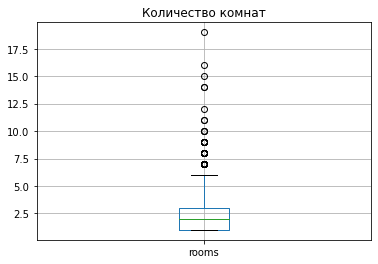

In [224]:
df.boxplot(column='rooms')
plt.title('Количество комнат')
plt.show()

In [225]:
df.query('rooms > 7').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20707,6,28659000.0,245.4,2016-03-31T00:00:00,14,2.5,4.0,168.3,2,False,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
11368,4,24000000.0,316.3,2015-03-25T00:00:00,8,2.5,5.0,187.0,5,False,...,129.3,0.0,Санкт-Петербург,24555.0,5129.0,0.0,5000,1.0,934.0,542.0
13317,14,19500000.0,309.7,2016-02-03T00:00:00,9,2.5,5.0,199.0,5,False,...,14.3,0.0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,5000.0,468.0
7812,11,150000000.0,230.0,2017-10-25T00:00:00,8,2.5,8.0,220.0,8,False,...,10.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,5000.0,135.0
18740,6,28500000.0,270.0,2015-03-02T00:00:00,16,2.5,4.0,180.0,4,False,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,5000.0,1365.0


In [226]:
df.drop(df[df.rooms > 7].index,inplace=True)
df.query('rooms > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## Общее количество этажей в доме

In [67]:
df['floors_total'].isna().sum()

82

In [68]:
df[(df['floor'] == 1) & (df['floors_total'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
236,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.5,NaN,20.750,1,False,...,7.35,0.0,Санкт-Петербург,22041.0,17369.0,0.0,5000,1.0,374.0,251.0
3792,1,1640000.0,23.98,2015-08-25T00:00:00,1,2.5,NaN,14.388,1,False,...,NaN,0.0,поселок Щеглово,61908.0,34085.0,0.0,5000,0.0,5000.0,378.0
15898,1,4100000.0,74.50,2017-04-22T00:00:00,3,2.5,NaN,44.700,1,False,...,NaN,0.0,Красное Село,25382.0,28806.0,0.0,5000,0.0,5000.0,72.0


In [227]:
df[(df['floor'] != 1) & (df['floors_total'].isna())].sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9358,0,18400000.0,101.80,2015-03-28T00:00:00,3,2.5,NaN,53.200,8,False,...,18.90,0.0,Санкт-Петербург,39393.000000,11096.000000,1.0,537.0,0.0,5000.0,863.0
23450,0,21187872.0,123.30,2017-04-25T00:00:00,3,2.5,NaN,50.400,18,False,...,23.60,0.0,Санкт-Петербург,19095.000000,4529.000000,0.0,5000,0.0,5000.0,104.0
14442,1,5595000.0,52.47,2016-03-23T00:00:00,2,2.5,NaN,31.482,10,False,...,NaN,0.0,Санкт-Петербург,7050.000000,13266.000000,1.0,868.0,0.0,5000.0,90.0
3806,5,4850000.0,37.40,2019-03-02T00:00:00,1,2.5,NaN,22.440,7,False,...,NaN,0.0,Санкт-Петербург,28040.300383,11602.304578,0.0,5000,0.0,5000.0,NaN
19238,10,5249478.0,51.77,2018-11-04T00:00:00,2,2.5,NaN,22.000,6,False,...,29.77,0.0,Санкт-Петербург,47303.000000,25866.000000,1.0,251.0,1.0,350.0,111.0


Сложно сказать, чем заполнить пропуски. В любом случае может быть многоэтажка. Можно попробовать удалить эти 85 строк, их меньше 10%. На выборку не повлияют. 

In [70]:
df = df.dropna(subset=['floors_total'])
df = df.reset_index(drop=True)
df['floors_total'].isna().sum()

0

## Цена 

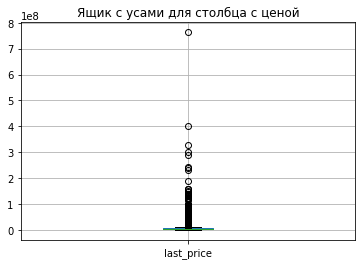

In [229]:
df.boxplot(column='last_price')
plt.title('Ящик с усами для столбца с ценой')
plt.show()

In [72]:
df['last_price'].sort_values()

8608         12190.0
14591       430000.0
17083       430000.0
15930       440000.0
17297       450000.0
            ...     
22330    289238400.0
15317    300000000.0
1396     330000000.0
14388    401300000.0
12677    763000000.0
Name: last_price, Length: 23180, dtype: float64

In [73]:
df['last_price'].max()

763000000.0

In [74]:
df.drop(df[df.last_price < 430000].index, inplace=True)
df['last_price'].min()

430000.0

# Работа с типами данных

In [75]:
#Типы данных: надо изменить в некоторых столбцах тип данных с float на int, а в столбце с is_apartment на bool
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23179 entries, 0 to 23179
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23179 non-null  int64  
 1   last_price            23179 non-null  float64
 2   total_area            23179 non-null  float64
 3   first_day_exposition  23179 non-null  object 
 4   rooms                 23179 non-null  int64  
 5   ceiling_height        23179 non-null  float64
 6   floors_total          23179 non-null  float64
 7   living_area           23179 non-null  float64
 8   floor                 23179 non-null  int64  
 9   is_apartment          23179 non-null  bool   
 10  studio                23179 non-null  bool   
 11  open_plan             23179 non-null  bool   
 12  kitchen_area          21767 non-null  float64
 13  balcony               23179 non-null  float64
 14  locality_name         23179 non-null  object 
 15  airports_nearest   

In [76]:
df.astype({'floors_total':'int64', 
             'balcony':'int64', 
             'parks_around3000':'int64', 
             'ponds_around3000':'int64',
             'last_price': 'int64',  
             'is_apartment':'bool'}).dtypes

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int64
parks_nearest            object
ponds_around3000          int64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменили тип данных в столбцах floors_total и balcony, потому что не может быть дробного у количества балконов или этажей в доме. В столбцах parks_around3000 и ponds_around3000, так как все равно расстояние небольшое, удобнее анализировать в целых числах. И is_apartment, так как подразумевается True и False.

## Посчитайте и добавьте в таблицу новые столбцы

In [230]:
df['square_meter_price'] = df['last_price']/df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.5,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.5,11.0,18.6,1,False,...,2.0,поселок Шушары,12817.0,18603.0,0.0,5000,0.0,5000.0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.5,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.5,14.0,95.4,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,2.5,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [231]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.5,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.5,11.0,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,5000,0.0,5000.0,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.5,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.5,14.0,95.4,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,2.5,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1


In [232]:
df['month'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.5,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.5,11.0,18.6,1,False,...,12817.0,18603.0,0.0,5000,0.0,5000.0,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.5,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.5,14.0,95.4,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,2.5,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6


In [233]:
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.5,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.5,11.0,18.6,1,False,...,18603.0,0.0,5000,0.0,5000.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.5,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.5,14.0,95.4,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,2.5,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [234]:
def floor_type(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type'] = df.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.5,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.5,11.0,18.6,1,False,...,0.0,5000,0.0,5000.0,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.5,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.5,14.0,95.4,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,2.5,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


In [82]:
import numpy as np
df['km_city_center'] = np.ceil(df['cityCenters_nearest']/1000)
df['km_city_center']

0        17.0
1        19.0
2        14.0
3         7.0
4         9.0
         ... 
23175     5.0
23176    66.0
23177    66.0
23178    11.0
23179    66.0
Name: km_city_center, Length: 23179, dtype: float64

## Проведите исследовательский анализ данных

### Изучение признаков с помощью гистограмм 

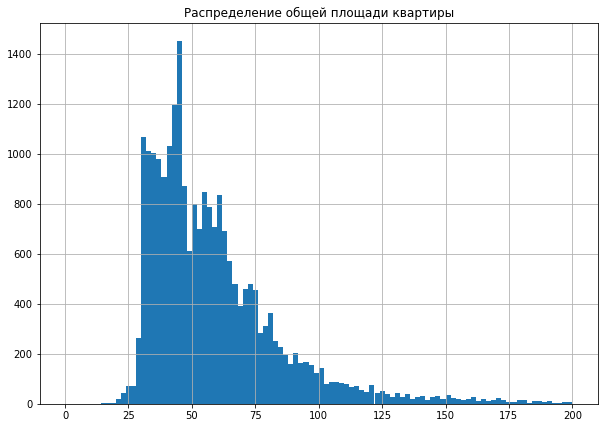

In [236]:
df.hist(column='total_area', range=(0,200), bins=100, figsize=(10,7))
plt.title('Распределение значений общей площади квартиры')
plt.show()

In [84]:
df['total_area'].mean()

60.37360757582275

In [85]:
df.total_area.median()

52.1

Основное количество предложений о продаже квартир с примерно 30кв метров за кв до 60 кв.метров. Предложения с метражом выше встречаются гораздо реже, видно спад, чем выше метраж, тем реже встречается. Наверное, это какое-то элитное жилье

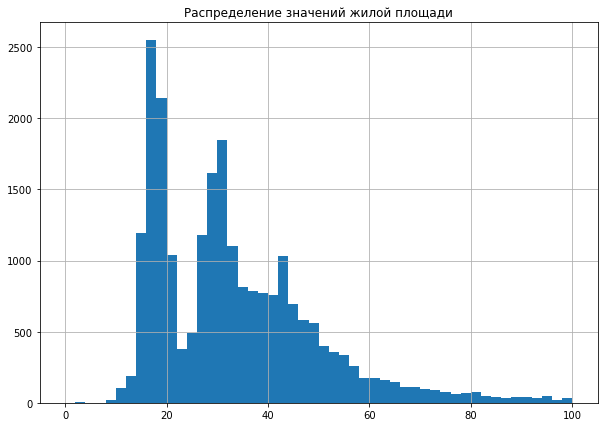

In [237]:
df.hist(column='living_area', range=(0,100), bins=50, figsize=(10,7))
plt.title('Распределение значений жилой площади')
plt.show()

In [87]:
df.living_area.mean()

34.96442035946303

In [88]:
df.living_area.median()

30.3

Здесь примерно похожая ситуация. Пиковые значения -- около 18-20 кв.метров за жилую площадь и второй пик - от 25 до 30 квадратов. Квартиры с жилой площадью более 40кв метров в Санкт-Петербурге и области встречаются гораздо реже.

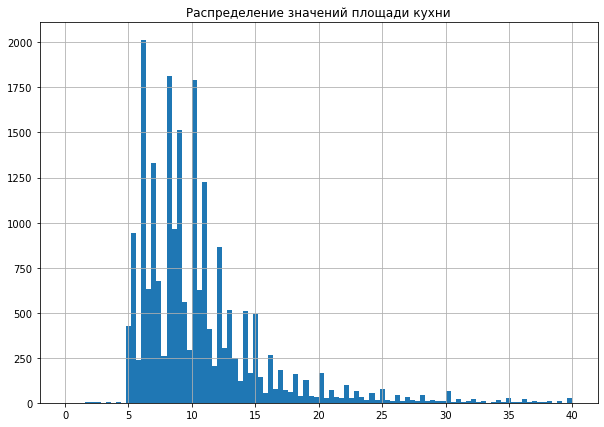

In [239]:
df.hist(column='kitchen_area', range=(0,40), bins=100, figsize=(10,7))
plt.title('Распределение значений площади кухни')
plt.show()

In [90]:
df.kitchen_area.mean()

10.841601506546633

In [91]:
df.kitchen_area.median()

9.3

Самые часто встречающиеся размеры кухни в датасете от 5 до 15 кв.метров

In [92]:
df['last_price'].max()

763000000.0

In [93]:
df.last_price.mean()

6508500.6119332155

In [94]:
df.last_price.median()

4650000.0

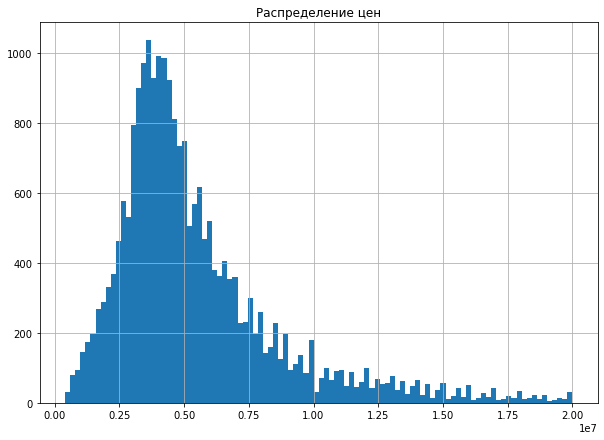

In [240]:
df.hist(column='last_price', range=(400000,20000000), bins=100, figsize=(10,7))
plt.title('Распределение цен')
plt.show()

In [241]:
df.query('last_price < 1000000').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type
7585,6,850000.0,53.0,2019-03-09,2,2.5,5.0,30.0,4,False,...,0.0,5000,0.0,5000.0,NaN,16037.735849,5,3,2019,другой
19932,9,860000.0,39.0,2018-07-04,2,2.5,2.0,29.0,1,False,...,0.0,5000,0.0,5000.0,115.0,22051.282051,2,7,2018,первый
601,5,790000.0,38.6,2018-04-03,2,2.5,2.0,24.0,1,False,...,0.0,5000,0.0,5000.0,374.0,20466.321244,1,4,2018,первый
3396,8,900000.0,35.0,2017-12-06,1,2.5,2.0,20.0,2,False,...,0.0,5000,0.0,5000.0,44.0,25714.285714,2,12,2017,последний
1737,9,800000.0,29.0,2018-09-12,1,2.5,5.0,15.0,4,False,...,0.0,5000,0.0,5000.0,NaN,27586.206897,2,9,2018,другой


Основное количество объявлений начинается от 2 млн до 7 млн. Похоже на нормальное распределение за исключением некоторых пиков

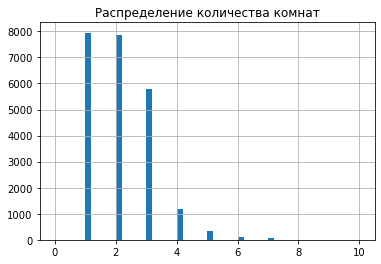

In [242]:
df.hist(column='rooms', range=(0,10), bins=50)
plt.title('Распределение количества комнат')
plt.show()

In [98]:
df.rooms.mean()

2.0807196168946027

In [99]:
df.rooms.median()

2.0

Большинство собственников предлагает квартиры с 1 или 2 комнататми, реже с 3 и совсем редко с 4 и больше. 0 комнат, возможно, имеются в виду студии

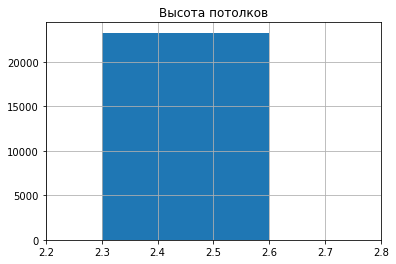

In [246]:
df.hist(column='ceiling_height', range=(2,5), bins=10)
plt.title('Высота потолков')
plt.xlim(2.2, 2.8)
plt.show()

In [101]:
df.ceiling_height.mean()

2.5

In [102]:
df.ceiling_height.median()

2.5

Большая часть квартир в датасете с почти стандартной высотой потолков, 2.3-2.5 м -- самая большая доля объявлений, а кто-то, видимо, живет в сталинках или со свободной планировкой, где высота потолков чуть выше стандартной и меньше 3м

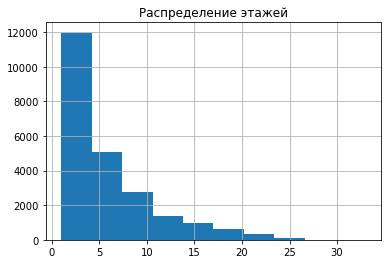

In [247]:
df.hist(column='floor')
plt.title('Распределение этажей')
plt.show()

In [104]:
df.floor.mean()

5.857414038569395

In [105]:
df.floor.median()

4.0

Большая часть квартир продается в пятиэтажках или в многоэтажках до 5 этажа. И лишь малая часть квартир находится выше 10 этажа.

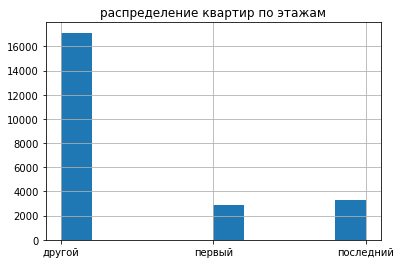

In [249]:
df['floor_type'].hist()
plt.title('распределение квартир по этажам')
plt.show()

Как и ожидалось, больше всего квартир не на первом и последнем этажах, а где-то между. 

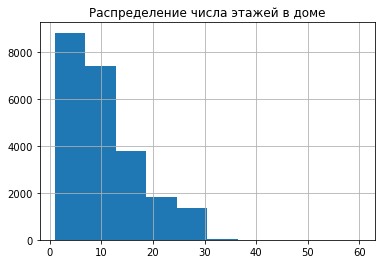

In [250]:
df.hist(column='floors_total')
plt.title('Распределение числа этажей в доме')
plt.show()

In [108]:
df.floors_total.mean()

10.63721472022089

In [109]:
df.floors_total.median()

9.0

Основная масса квартир находится в домах, где всего 10 этажей. 

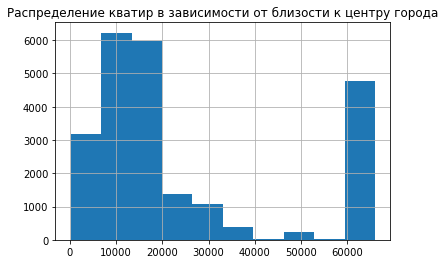

In [257]:
df['cityCenters_nearest'].hist()
plt.title('Распределение кватир в зависимости от близости к центру города')
plt.show()

In [111]:
df.cityCenters_nearest.mean()

24992.247649925535

In [112]:
df.cityCenters_nearest.median()

14938.0

Есть два пика -- какие-то квартиры расположены близко к центру городу (в пределах 1 км), а какие-то очень далеко -- свыше 60 км

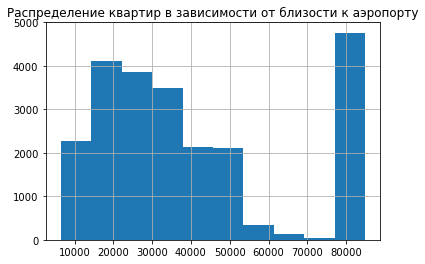

In [258]:
df['airports_nearest'].hist()
plt.title('Распределение квартир в зависимости от близости к аэропорту')
plt.show()

In [114]:
df['airports_nearest'].min()

6450.0

In [115]:
df['airports_nearest'].max()

84869.0

In [116]:
df['airports_nearest'].mean()

40855.54685236935

In [117]:
df['airports_nearest'].median()

33313.0

Большая часть квартир расположена в 10-50 км от аэропорта. Тут можно увидеть нормальное распределение значение. Второй пик, самый большой приходится на расстояние свыше 80 км от ближайшего аэропорта.

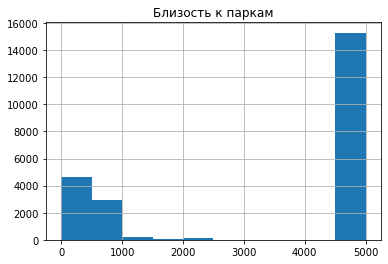

In [259]:
df['parks_nearest'].hist()
plt.title('Близость к паркам')
plt.show()

In [119]:
df['parks_nearest'].mean()

3456.1040597092197

In [120]:
df['parks_nearest'].median()

5000.0

Большая часть квартир находится далеко от ближайшего парка

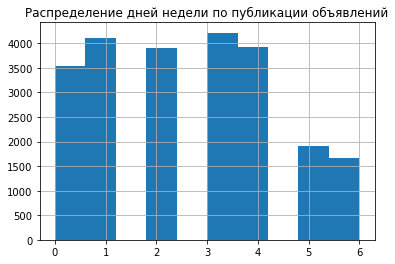

In [260]:
df['weekday'].hist()
plt.title('Распределение дней недели по публикации объявлений')
plt.show()

Неудивительно, что люди предпочитают выкладывать любые объявления в будни, а не в выходные. Так и с квартирами. Основная масса объявлений выложена с понедельника по пятницу

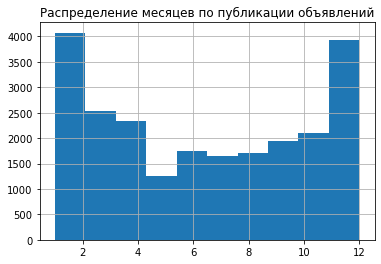

In [261]:
df['month'].hist()
plt.title('Распределение месяцев по публикации объявлений')
plt.show()

Основная масса объявлений выложена либо до Нового года, либо сразу после, в январе. Есть большой спад в мае, вероятно, люди готовятся к отпускам, а не думают о продаже квартиры)

### Как долго продавались квартиры

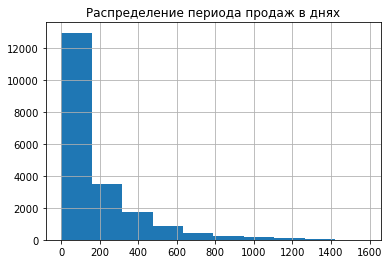

In [262]:
df['days_exposition'].hist()
plt.title('Распределение периода продаж в днях')
plt.show()

In [124]:
df['days_exposition'].mean()

181.44847185521263

In [263]:
df.query('days_exposition <= 45').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type
7794,5,6400000.0,76.90,2018-11-11,2,2.5,4.0,36.90,2,False,...,1.0,223.0,1.0,294.0,11.0,83224.967490,6,11,2018,другой
9757,0,7000000.0,49.40,2017-07-21,1,2.5,16.0,21.40,13,False,...,1.0,38.0,0.0,5000.0,6.0,141700.404858,4,7,2017,другой
22278,0,3200000.0,54.00,2017-12-16,2,2.5,5.0,32.40,5,False,...,0.0,5000,0.0,5000.0,38.0,59259.259259,5,12,2017,последний
5181,4,5200000.0,61.00,2019-02-11,3,2.5,9.0,41.40,1,False,...,0.0,5000,0.0,5000.0,43.0,85245.901639,0,2,2019,первый
21865,8,4310000.0,31.48,2019-03-24,1,2.5,25.0,21.48,5,False,...,0.0,5000,1.0,674.0,28.0,136912.325286,6,3,2019,другой


In [264]:
df.query('days_exposition == 232').sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type
17908,5,3700000.0,60.6,2018-01-10,2,2.5,8.0,31.6,2,False,...,0.0,5000,0.0,5000.0,232.0,61056.105611,2,1,2018,другой
17726,7,3200000.0,31.0,2018-06-03,1,2.5,5.0,16.0,3,False,...,0.0,5000,1.0,655.0,232.0,103225.806452,6,6,2018,другой


In [127]:
df['days_exposition'].median()

96.0

In [128]:
df['days_exposition'].min()

1.0

In [129]:
df['days_exposition'].sort_values(ascending=False)

18437    1580.0
1079     1572.0
9351     1553.0
1837     1513.0
6546     1512.0
          ...  
23165       NaN
23166       NaN
23175       NaN
23177       NaN
23179       NaN
Name: days_exposition, Length: 23179, dtype: float64

In [130]:
df['days_exposition'].describe()

count    20057.000000
mean       181.448472
std        219.860488
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**: В среднем выходит, что квартира продается от 3 месяцев до полугода (96 дней), но бывают и такие, которые продаются по несколько лет, однако их очень малое количество. Например, есть квартира, которая продавалась 4 года (1580)!!! А есть квартиры, которые, условно, продавались необчайно быстро. Например, минимальное время размещения объявления -- сутки! Нереальная скорость, возможно, собственник передумал и снял объявление через сутки или ему необычайно повезло.
25 квантиль показывает, что меньшая часть квартир продавалась чуть больше месяца -- 45 дней. Вероятно, этот период можно назвать как самый быстрый срок продажи квартир. 
75 квантиль составляет 232 дня, это примерно 7 месяцев с момента публикации объявления о продаже. Это одни из самых долгих продаж, однако они чуть больше среднего, примерно на полтора месяца и сильно больше медианного значения -- 3  месяца(96 дней)

### Зависимость цены от общей площади, жилой площади, площади кухни, количества комнат, типа этажа, дня недели, месяца и года

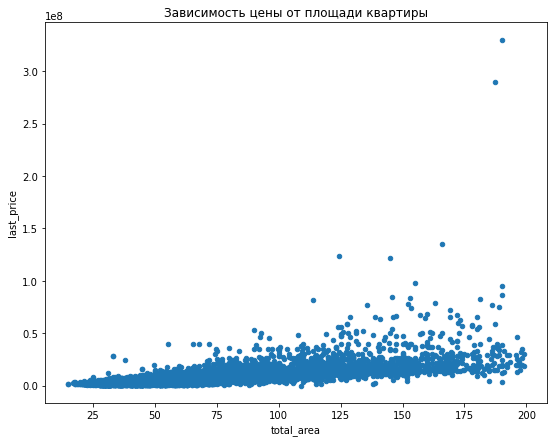

In [273]:
#сгруппируем данные по общей площади квартиры и выведем среднее по цене, посмотрим, есть ли зависимость цены от площади.
df.query('total_area < 200').plot(x='total_area', y='last_price', kind='scatter', figsize=(9,7))
plt.title('Зависимость цены от площади квартиры')
plt.show()

In [132]:
df['total_area'].corr(df['last_price'])

0.6395542738905565

Зависимость есть, и очень большая, по сути, видим линейную зависимость. Корреляция положительная, то есть чем больше площадь, тем больше цена.

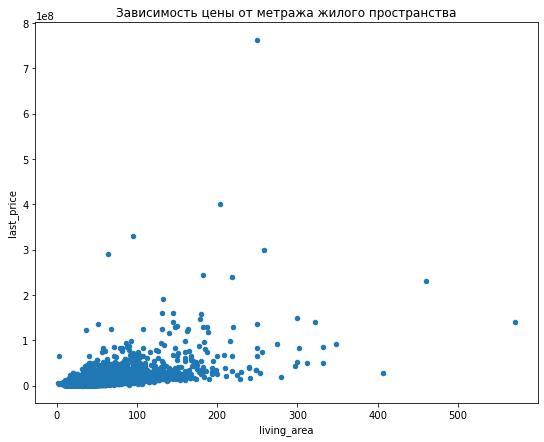

In [272]:
#изучим наличие корреляции между ценой и жилой площадью, построим график рассеяния 
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(9,7))
plt.title('Зависимость цены от метража жилого пространства')
plt.show()

In [134]:
df['living_area'].corr(df['last_price'])

0.5684114154739993

Взаимосвязь есть, тоже линейная в целом, чем больше жилая площадь, тем выше цена

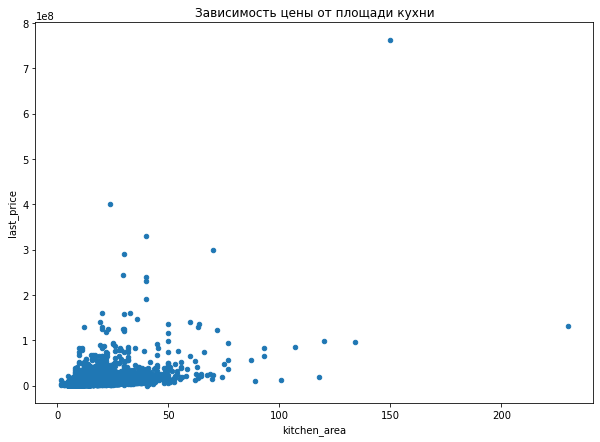

In [274]:
#корреляция между площадью кухни и ценой
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10,7))
plt.title('Зависимость цены от площади кухни')
plt.show()

In [136]:
df['kitchen_area'].corr(df['last_price'])

0.48855513566962233

Аналогичная положительная корреляция, как и в предыдущих двух случаях

In [137]:
#количество комнат и цена, построим сводную таблицу и выведем медианную цену
price_room_influence = df.pivot_table(index='rooms', values='last_price', aggfunc='median')
price_room_influence

,last_price
rooms,
1,3600000.0
2,4775500.0
3,6200000.0
4,9000000.0
5,14000000.0
6,19000000.0
7,24900000.0


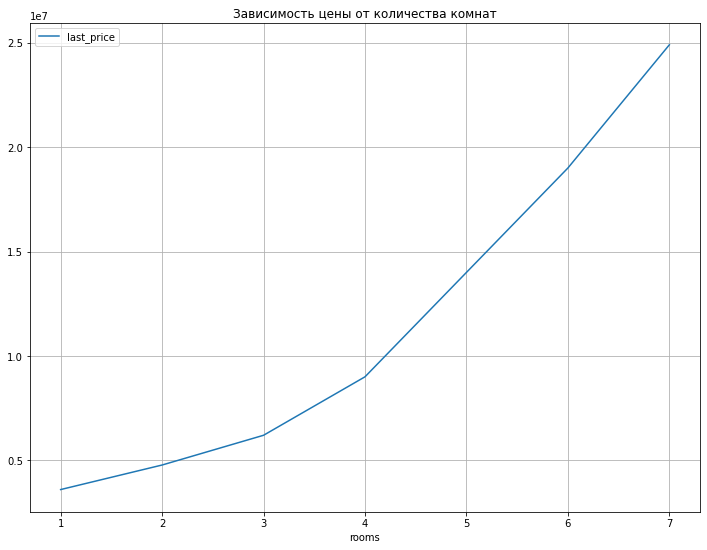

In [275]:
price_room_influence.plot(figsize=(12,9), grid=True)
plt.title('Зависимость цены от количества комнат')
plt.show()

In [139]:
df['rooms'].corr(df['last_price'])

0.3509891317907535

Корреляция также положительная. Прямая зависимость: чем больше комнат, тем выше цена

In [140]:
floor_price_attr = df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_price_attr

,last_price
floor_type,
другой,4880000.0
первый,3900000.0
последний,4350000.0


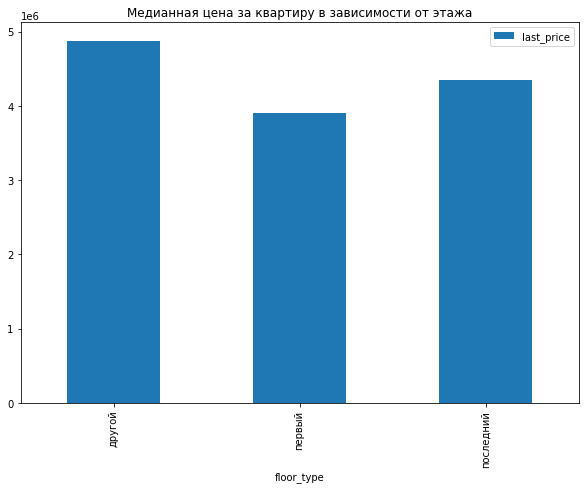

In [277]:
floor_price_attr.plot.bar(figsize=(10,7))
plt.title('Медианная цена за квартиру в зависимости от этажа')
plt.show()

Особой зависимости между категориями этажа (первый, последний, другой), как мне кажется, нет. Однако, как ожидалось, цена за квартиру на первом этаже чуть ниже. В принципе это логично и объяняется определенными рисками и неудобствами

In [142]:
weekday_price = df.pivot_table(index='weekday', values='last_price', aggfunc='median')
weekday_price

,last_price
weekday,
0,4665000.0
1,4750000.0
2,4750000.0
3,4659200.0
4,4600000.0
5,4600000.0
6,4550000.0


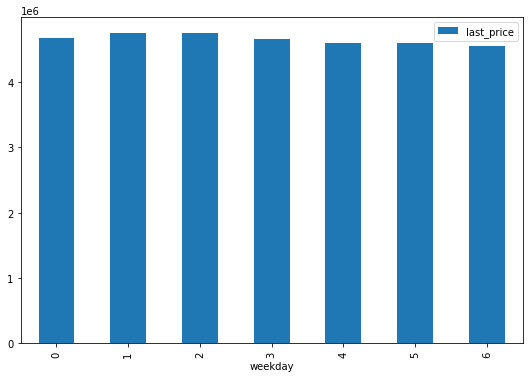

In [278]:
weekday_price.plot.bar(figsize=(9,6))
plt.show()

In [144]:
df['weekday'].corr(df['last_price'])

0.0027788810341357055

Корреляции нет, видимо, нет особой разницы, в какой день недели продавать квартиру, цена одна

In [145]:
month_price = df.pivot_table(index='month', values='last_price', aggfunc='median')
month_price

,last_price
month,
1,4600000.0
2,4670000.0
3,4700000.0
4,4800000.0
5,4550000.0
6,4400000.0
7,4677500.0
8,4600000.0
9,4705142.0


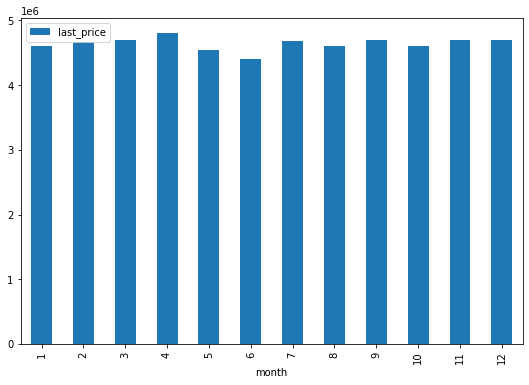

In [279]:
month_price.plot.bar(figsize=(9,6))
plt.show()

In [147]:
df['month'].corr(df['last_price'])

0.001516206224273638

Здесь тоже нет особой корреляции, сезонный фактор, если и влияет на цену, то не сильно, либо в совокупности с другими факторами. На графике, единственное что заметно, это то, что в мае-июне цена за кв чуть ниже, но вряд ли это показывает особую взаимосвязь

In [148]:
year_price = df.pivot_table(index='year', values='last_price', aggfunc='median')
year_price

,last_price
year,
2014,8037000.0
2015,5300000.0
2016,4550000.0
2017,4500000.0
2018,4600000.0
2019,5100000.0


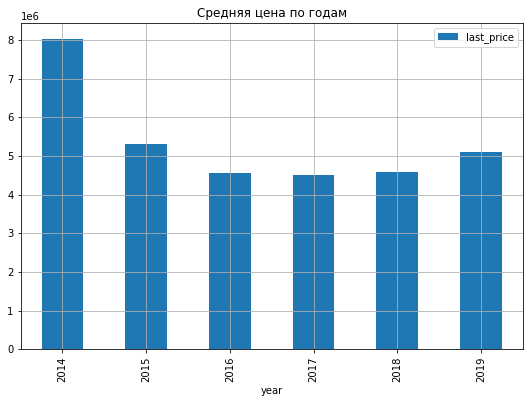

In [280]:
year_price.plot.bar(figsize=(9,6), grid=True)
plt.title('Средняя цена по годам')
plt.show()

In [150]:
df['year'].corr(df['last_price'])

-0.04224365701505273

А по году, как ни странно, график вырисовывается необычный. В 2014 году квартиры в Питере и окрестностях были самые дорогие, а с 2015 цена резко снизилась, небольшой подъем заметен только в 2019 году. 

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [151]:
top10 = list(df['locality_name'].value_counts().head(10).index)
top10

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [152]:
top = df.query('locality_name in @top10').pivot_table(index='locality_name', values='square_meter_price').sort_values(by='square_meter_price', ascending=False)
top.head(1)

,square_meter_price
locality_name,
Санкт-Петербург,114507.632469


In [153]:
top.tail(1)

,square_meter_price
locality_name,
Выборг,58285.918011


Самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая - в Выборге

### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [154]:
import warnings

warnings.filterwarnings("ignore")

sp = df.query('locality_name == "Санкт-Петербург"')
sp.loc[:, 'km_city_center'] = sp['km_city_center'].round()
square_meter_mean_price = sp['square_meter_price'].mean() #средняя цена за кв. метр в Питере
sp.loc[:, 'mean_price_per_km'] = square_meter_mean_price / sp['km_city_center'] #средняя цена каждого км
sp['mean_price_per_km']

0         6735.743086
2         8179.116605
3        16358.233210
4        12723.070274
7         9542.302706
             ...     
23170     6735.743086
23171    16358.233210
23172    22901.526494
23175    22901.526494
23178    10409.784770
Name: mean_price_per_km, Length: 15444, dtype: float64

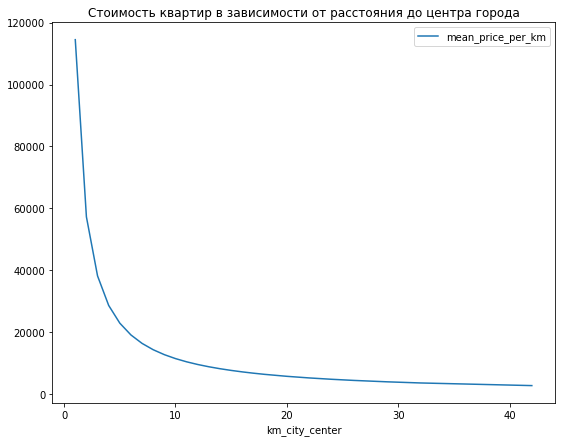

In [284]:
sp.sort_values(by='km_city_center').plot(x='km_city_center', y='mean_price_per_km', figsize=(9,7))
plt.title('Стоимость квартир в зависимости от расстояния до центра города')
plt.show()

Чем ближе квартира к центру, тем выше цена, буквально улетает в космос. 

### Общий вывод

Цель исследования заключалась в том, чтобы проанализировать датасет о продаже квартир в Санкт-Петербурге и окрестностях и выявить взаимосвязь параметров. В идеале нужно ответить на вопрос -- какие факторы влияют на продажу квартир в этом регионе.

В ходе исследования на этапе предобработки данных были выявлены пропуски в 11 столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition. Изучение пропусков позволило предположить, что есть как случайные (из-за технического сбоя), так и неслучайные пропуски. В частности, к неслучайным можно отнести пропуски в признаке "количество балконов", так как отсутствие записи, предположительно равно отсутствю балкона в квартире. Также с некоторыми пропусками в столбцах о ближайшем парке, пруде, аэропорте -- пропуск мог означать, что квартира находится очень далеко. 

Также в предобработке столкнулась с аномалиями -- во-первых, нужно было привести в порядок наименования населенных пунктов, избавившись от неявных дубликатов по типу "поселок и посёлок". Помимо этого, ящик с усами и выделение минимального значения у некоторых столбцов позволило определить аномалии в данных, например, минимальная цена за квартиру в 12 тысяч рублей. От таких аномалий пришлось избавиться, благо, их было меньше 10% в каждом столбце. Далее пришлось заменить пропуски либо средним, либо медианным, либо каким-то другим значением. Чаще всего выбирала медиану там, где это возможно, так как она менее чувствительна к выбросам. В столбце с жилой площадью и площадью кухни пришлось учитывать общую площадь и заполнять значением, примерно соответствующим доле этой площади в общей. 

В целом, проанализировав датасет, видно, что на цену квартиры влияют такие параметры, как общая площадь жилья, площадь жилого пространства, кухни и количество комнат. В каждом из этих случаев зависимость прямая -- чем больше один из признаков, тем выше цена. Сезонный фактор, то есть в какой месяц года было выложено объявление практически не влияло на цену, максимум, что можно сказать, это то, что в мае и июне в целом объявлений о продаже жилплощади было чуть меньше, но не существенно. Кроме того, не влияет и день недели, однако в будни люди в целом чаще выкладывают объявления о продаже жилья.